In [1]:
import pandas as pd
import sqlite3
import json
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from path_util import data_path

In [2]:
db_path = data_path / "data_bases" / "all_occupations.db"

con = sqlite3.connect(db_path)

df_all = pd.read_sql('SELECT occ_code, occ_group, occ_title, lenient_links, lenient_revs, lenient_lengths, women, white, african_american, asian, hispanic  FROM occupations', con)

df = df_all # make sure there is a copy

print("The number of entries:", len(df))
df.head(4)

The number of entries: 1395


,occ_code,occ_group,occ_title,lenient_links,lenient_revs,lenient_lengths,women,white,african_american,asian,hispanic
0,11-0000,major,Management Occupations,"[[""Certified Financial Manager"", ""http://en.wi...","{""Certified Financial Manager"": [{""revid"": 581...","{""Certified Financial Manager"": 2611, ""Marketi...",0.409,0.822,0.086,0.065,0.111
1,11-1000,minor,Top Executives,"[[""General manager"", ""http://en.wikipedia.org/...","{""General manager"": [{""revid"": 749862417, ""use...","{""General manager"": 7116, ""Chief executive off...",null,null,null,null,null
2,11-1010,broad,Chief Executives,"[[""Chief executive officer"", ""http://en.wikipe...","{""Chief executive officer"": [{""revid"": 6437689...","{""Chief executive officer"": 17489}",0.291,0.857,0.059,0.068,0.074
3,11-1011,detailed,Chief Executives,"[[""Chief executive officer"", ""http://en.wikipe...","{""Chief executive officer"": [{""revid"": 6437689...","{""Chief executive officer"": 17489}",0.291,0.857,0.059,0.068,0.074


[1.0, 0.128, 0.694, 0.545]


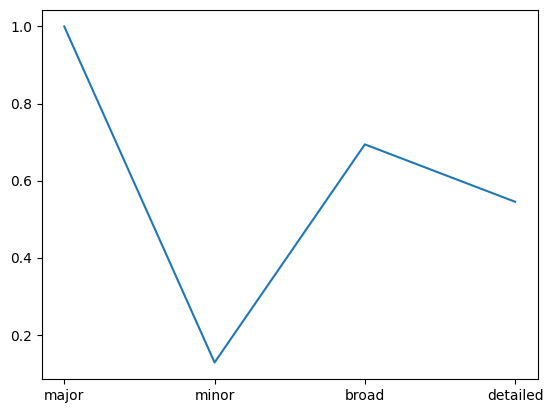

In [3]:
pct_major = round((len(df.loc[(df['occ_group'] == "major") & (df['women'] != "null")]) / 22), 3)
pct_minor = round((len(df.loc[(df['occ_group'] == "minor") & (df['women'] != "null")]) / 94), 3)
pct_broad = round((len(df.loc[(df['occ_group'] == "broad") & (df['women'] != "null")]) / 448), 3)
pct_detailed = round((len(df.loc[(df['occ_group'] == "detailed") & (df['women'] != "null")]) / 831), 3)

values = [pct_major, pct_minor, pct_broad, pct_detailed]
descriptions = ["major", "minor", "broad", "detailed"]

print(values)
plt.plot(descriptions, values)

## Deleting nulls, parsing floats

In [4]:
df = df.loc[df['women'] != "null"] # delete nulls
df = df.dropna()

# fix parsing as float and rounding
for col in ["women", "white", "african_american", "asian", "hispanic"]:
    df[col] = df[col].astype(float)
    df[col] = df[col].apply(lambda x: round(x, 3))

In [5]:
print("test")

test
